# 통신사 고객의 가입 해지 여부 예측 모델

## 데이터
- gender(성별)<br>
    Whether the customer is a male or a female


- SeniorCitizen(고령자 여부)<br>
    Whether the customer is a senior citizen or not (1, 0)


- Partner(배우자 유무)<br>
    Whether the customer has a partner or not (Yes, No)


- Dependents(부양가족 유무)<br>
    Whether the customer has dependents or not (Yes, No)


- tenure(근속월수)<br>
    Number of <strong>months</strong> the customer has stayed with the company


- PhoneService(휴대폰 유무)<br>
    Whether the customer has a phone service or not (Yes, No)


- MultipleLines(휴대폰 2개 이상 여부)<br>
    Whether the customer has multiple lines or not (Yes, No, No phone service)


- InternetService(인터넷 이용 여부 + 종류)<br>
    Customer’s internet service provider (DSL, Fiber optic, No)


- OnlineSecurity(보안 설정 여부)<br>
    Whether the customer has online security or not (Yes, No, No internet service)
    
    
- OnlineBackup(온라인 백업 여부)<br>
    Whether the customer has online backup or not (Yes, No, No internet service)

 
- DeviceProtection(단말기 보안 설정 여부)<br>
    Whether the customer has device protection or not (Yes, No, No internet service)


- TechSupport(기술 지원 여부)<br>
    Whether the customer has tech support or not (Yes, No, No internet service)


- StreamingTV(TV 시청 여부) <br>
    Whether the customer has streaming TV or not (Yes, No, No internet service)


- StreamingMovies(영화 시청 여부) <br>
    Whether the customer has streaming movies or not (Yes, No, No internet service)


- Contract(약정 기간) <br>
    The contract term of the customer (Month-to-month, One year, Two year)


- PaperlessBilling(디지털 청구서 수신 여부) <br>
    Whether the customer has paperless billing or not (Yes, No)


- PaymentMethod(결제 방식)<br>
    The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))


- MonthlyCharges(월 지불 금액)  <br>
    The amount charged to the customer monthly


- TotalCharges(지불할 총 금액) <br>
    The total amount charged to the customer


- Churn (가입 해지 여부)<br>
    Whether the customer churned or not (Yes or No)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
#         print(os.path.join(dirname, filename))
        main_df = pd.read_csv(os.path.join(dirname, filename))

#         result_df = pd.read_csv(os.path.join(dirname, filename))
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
main_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


------------------------------
YES or NO 답변이 많다보니 object 타입이 많다. <br>
타입 변환이 필요해보인다.<br><br>



In [4]:
main_df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

----------------
nunique값을 보니 Yes, No 형식이 제대로 맞춰져있나보다. (ex) YeS,YES,no,no phone service 이런식으로 되어 있는게 없다)

In [5]:
main_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# 전처리

## 총지불금액(TotalCharges) -> float

In [6]:
main_df['TotalCharges'] = main_df['TotalCharges'].replace(' ','0').astype(float) 


In [7]:
main_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
main_df.loc[main_df.TotalCharges == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


-----------------
TotalCharges가 누락된 고객명단 -> contract를 참고해서 예측값을 넣자

## Contract -> int

In [9]:
dic = {'Month-to-month':1, 'One year':12, 'Two year': 24} 
for c in main_df.Contract.unique():
    main_df.Contract.replace(c,dic[c], inplace = True)

## TotalCharges 누락값 계산 : MonthlyCharges * Contract

In [10]:
#TotalCharges가 0인 고객 예측값    
main_df['TotalCharges'].replace(0.0,main_df['MonthlyCharges']*main_df['Contract'], inplace = True)

In [11]:
main_df.loc[main_df.TotalCharges == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


-------------------
이제 모든 고객의 TotalCharges가 채워졌다.

In [12]:
main_df.TotalCharges.describe()

count    7043.000000
mean     2281.253259
std      2265.703526
min        18.800000
25%       401.900000
50%      1396.250000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

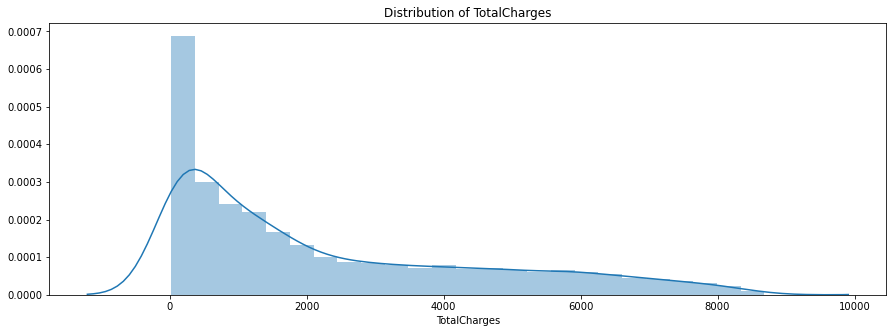

In [13]:
plt.figure(figsize=(15,5))
sns.distplot(main_df.TotalCharges)
plt.xlabel("TotalCharges")
plt.title("Distribution of TotalCharges")
plt.show()

In [14]:
main_df.TotalCharges.nunique()

6541

-----------
그런데 값의 분포가 너무 넓어서 binning을 수행해야할 것 같다.

In [15]:
tmp_min = main_df.TotalCharges.min() #최솟값
tmp_max = main_df.TotalCharges.max() #최댓값
tmp_mean = main_df.TotalCharges.mean() #평균
bins = [tmp_min,tmp_mean/7,tmp_mean/2,tmp_mean,tmp_max/2,tmp_max] #최소~평균/7,평균/7~평균/2,평균/2 ~평균,평균~최대/2,최대/2~최대 
bins

[18.8,
 325.89332265065667,
 1140.6266292772984,
 2281.253258554597,
 4342.4,
 8684.8]

In [16]:
main_df['TotalCharges_bin'] = pd.cut(main_df.TotalCharges, bins, labels = list(range(len(bins)-1)))
main_df['TotalCharges_bin'].head()

0    0
1    2
2    0
3    2
4    0
Name: TotalCharges_bin, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [17]:
main_df.TotalCharges_bin.value_counts()

0    1578
1    1548
4    1467
2    1267
3    1182
Name: TotalCharges_bin, dtype: int64

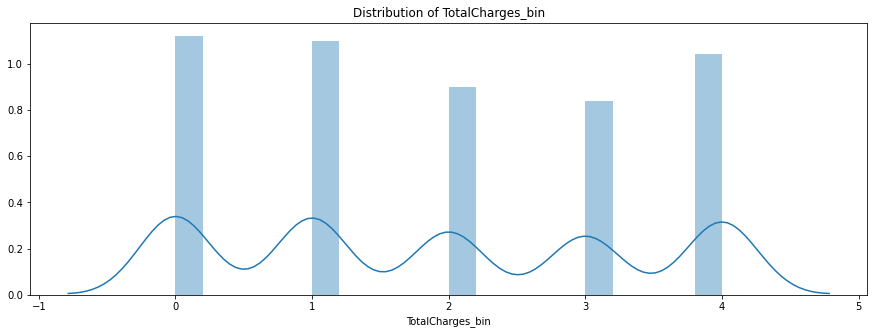

In [18]:
plt.figure(figsize=(15,5))
sns.distplot(main_df.TotalCharges_bin)
plt.xlabel("TotalCharges_bin")
plt.title("Distribution of TotalCharges_bin")
plt.show()

------------------
5개의 그룹을 생성하여 분포의 범위를 줄였고, 그룹당 구성원 수도 비슷하게 맞추었다. 

## object -> category

In [19]:
main_df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6541
Churn                  2
TotalCharges_bin       5
dtype: int64

In [20]:
for c in filter(lambda x: main_df[x].dtype == 'O' and main_df[x].nunique() <=4, main_df.columns):
    main_df[c] = main_df[c].astype("category")

In [21]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   int64   
 16  PaperlessBilling  7043 n

In [22]:
main_df.describe()

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,8.835865,64.761692,2281.253259
std,0.368612,24.559481,9.551444,30.090047,2265.703526
min,0.000000,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,1.000000,35.500000,401.900000
50%,0.000000,29.000000,1.000000,70.350000,1396.250000
75%,0.000000,55.000000,12.000000,89.850000,3786.600000
max,1.000000,72.000000,24.000000,118.750000,8684.800000


--------------------------------
customerID를 제외한 모든 object타입을 적절한 타입으로 변환시켰다.

# EDA

## TotalCharges와 Churn의 상관관계는?

No     3001
Yes    1393
Name: Churn, dtype: int64
No     2173
Yes     476
Name: Churn, dtype: int64
No     870
Yes    708
Name: Churn, dtype: int64
No     1254
Yes     213
Name: Churn, dtype: int64


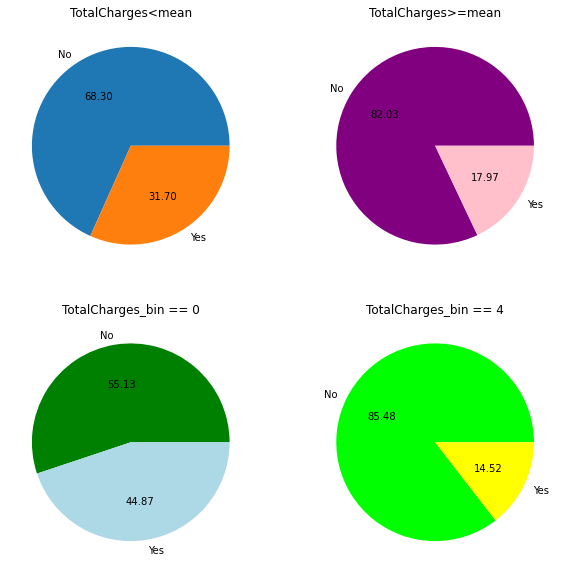

In [124]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("TotalCharges<mean")
print(main_df.loc[main_df.TotalCharges<tmp_mean].Churn.value_counts())
plt.pie(main_df.loc[main_df.TotalCharges<tmp_mean].Churn.value_counts(),autopct ='%.2f', labels=['No','Yes'])
plt.subplot(2,2,2)
plt.title("TotalCharges>=mean")
print(main_df.loc[main_df.TotalCharges>=tmp_mean].Churn.value_counts())
plt.pie(main_df.loc[main_df.TotalCharges>tmp_mean].Churn.value_counts(),autopct ='%.2f', labels=['No','Yes'], colors=['purple', 'pink'])
plt.subplot(2,2,3)
plt.title("TotalCharges_bin == 0")
print(main_df.loc[main_df.TotalCharges_bin==0].Churn.value_counts())
plt.pie(main_df.loc[main_df.TotalCharges_bin==0].Churn.value_counts(),autopct ='%.2f', labels=['No','Yes'], colors=['green', 'lightblue'])
plt.subplot(2,2,4)
plt.title("TotalCharges_bin == 4")
print(main_df.loc[main_df.TotalCharges_bin==4].Churn.value_counts())
plt.pie(main_df.loc[main_df.TotalCharges_bin==4].Churn.value_counts(),autopct ='%.2f', labels=['No','Yes'], colors=['lime', 'yellow'])
plt.show()

--------------------
위 결과를 보았을 때 TotalCharges이 높은 고객은 확실히 해지율이 낮다.<br><br>
그리고 그 차이는 양 끝단(TotalCharges가 아주 낮거나 아주 높을 때)에서 더 확연하다.

## Tenure과 Churn의 상관관계는?

No     2315
Yes    1460
Name: Churn, dtype: int64
No     2859
Yes     409
Name: Churn, dtype: int64


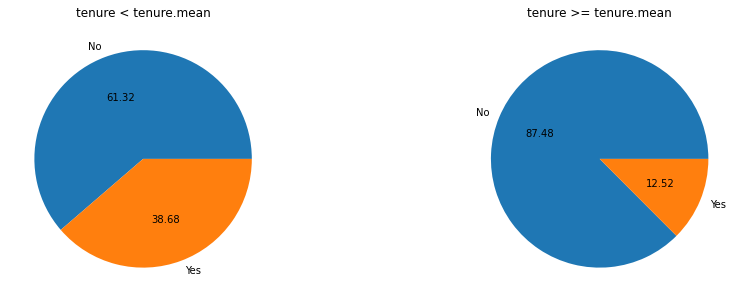

In [176]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("tenure < tenure.mean")
print(main_df.loc[main_df.tenure<main_df.tenure.mean()].Churn.value_counts())
plt.pie(main_df.loc[main_df.tenure<main_df.tenure.mean()].Churn.value_counts(), labels=['No','Yes'],autopct="%.2f")
plt.subplot(1,2,2)
plt.title("tenure >= tenure.mean")
print(main_df.loc[main_df.tenure>=main_df.tenure.mean()].Churn.value_counts())
plt.pie(main_df.loc[main_df.tenure>=main_df.tenure.mean()].Churn.value_counts(), labels=['No','Yes'],autopct="%.2f")

plt.show()

---------------------------
평균을 기준으로 근속월수가 높은 사람이 낮은 사람보다 해지 않을 확률이 훨씬 높다.

## Contract과 Churn의 상관관계는?

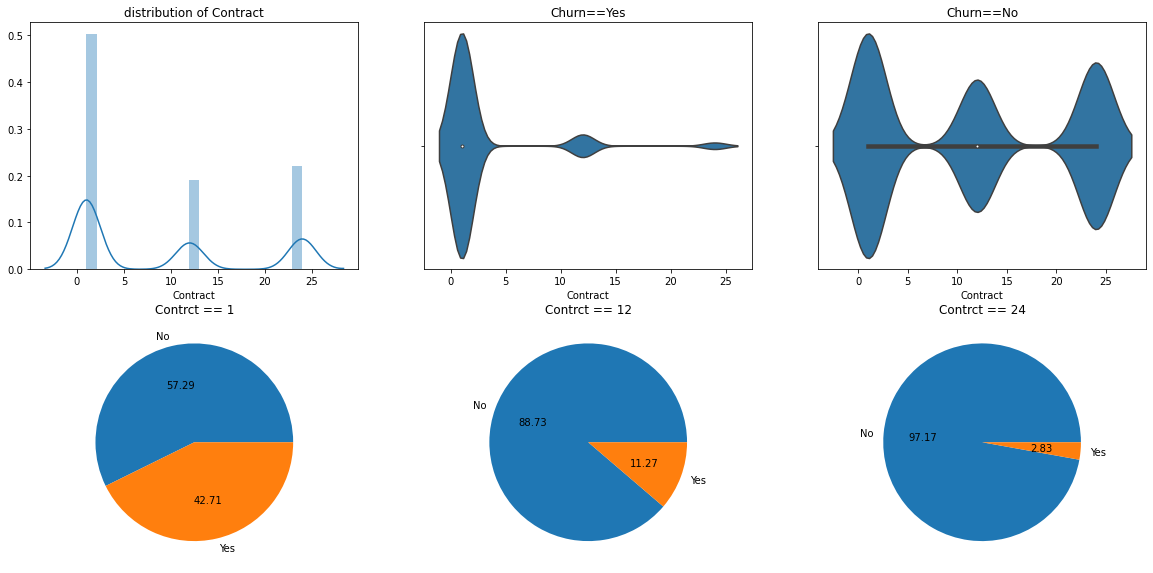

In [189]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.title("distribution of Contract")
sns.distplot(main_df.Contract)

plt.subplot(2,3,2)
plt.title("Churn==Yes")
sns.violinplot(main_df.loc[main_df.Churn=='Yes'].Contract)

plt.subplot(2,3,3)
plt.title("Churn==No")
sns.violinplot(main_df.loc[main_df.Churn=='No'].Contract)

for e,month in enumerate([1,12,24],4):
    plt.subplot(2,3,e)
    plt.title(f"Contract == {month}")
    plt.pie(main_df.loc[main_df.Contract==month].Churn.value_counts(), autopct="%.2f", labels = main_df.loc[main_df.Contract==month].Churn.value_counts().keys())

plt.show()

--------------
위 결과에 따라 Contract가 높을수록 해지율이 낮아지는 것을 확인할 수 있다.

## 여러 서비스(StreamingTV, Movies, TechSupport 등)를 이용하는 사람들은 해지율이 낮지 않을까?

## 근속월수와 가입해지율과의 상관관계는?

## 디지털 친화도와 해지율과의 상관관계는?
    - 디지털 친화도 측정 방법: 백업, 보안, 다양한 서비스 이용여부 등 정보를 활용